In [252]:
!git clone https://github.com/naufalhajid/Poverty-in-Indonesia.git

fatal: destination path 'Poverty-in-Indonesia' already exists and is not an empty directory.


In [253]:
!pip install xgboost

In [254]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [255]:
# Membaca dataset dengan pemisah titik koma
df = pd.read_csv('/content/Poverty-in-Indonesia/Klasifikasi Tingkat Kemiskinan di Indonesia.csv', delimiter=';')

# Menampilkan 5 baris pertama dari dataset
df


,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98","9,48",7148.0,"66,41","65,28","71,56","87,45","5,71","71,15",1648096.0,0.0
1,ACEH,Aceh Singkil,"20,36","8,68",8776.0,"69,22","67,43","69,56","78,58","8,36","62,85",1780419.0,1.0
2,ACEH,Aceh Selatan,"13,18","8,88",8180.0,"67,44","64,4","62,55","79,65","6,46","60,85",4345784.0,0.0
3,ACEH,Aceh Tenggara,"13,41","9,67",8030.0,"69,44","68,22","62,71","86,71","6,43","69,62",3487157.0,0.0
4,ACEH,Aceh Timur,"14,45","8,21",8577.0,"67,83","68,74","66,75","83,16","7,13","59,48",8433526.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    object 
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    object 
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    float64
 5   Indeks Pembangunan Manusia                                            514 non-null    object 
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    object 
 7  

In [257]:
df.isnull().sum()

,0
Provinsi,485
Kab/Kota,485
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),485
Rata-rata Lama Sekolah Penduduk 15+ (Tahun),485
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),485
Indeks Pembangunan Manusia,485
Umur Harapan Hidup (Tahun),485
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,485
Persentase rumah tangga yang memiliki akses terhadap air minum layak,485
Tingkat Pengangguran Terbuka,485


In [258]:
# Convert columns with comma decimals to string first, then replace comma with dot, and finally convert to float
df_cleaned['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'] = df_cleaned['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'].astype(str).str.replace(',', '.').astype(float)
df_cleaned['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'] = df_cleaned['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'].astype(str).str.replace(',', '.').astype(float)
df_cleaned['Indeks Pembangunan Manusia'] = df_cleaned['Indeks Pembangunan Manusia'].astype(str).str.replace(',', '.').astype(float)
df_cleaned['Umur Harapan Hidup (Tahun)'] = df_cleaned['Umur Harapan Hidup (Tahun)'].astype(str).str.replace(',', '.').astype(float)
df_cleaned['Persentase rumah tangga yang memiliki akses terhadap sanitasi layak'] = df_cleaned['Persentase rumah tangga yang memiliki akses terhadap sanitasi layak'].astype(str).str.replace(',', '.').astype(float)
df_cleaned['Persentase rumah tangga yang memiliki akses terhadap air minum layak'] = df_cleaned['Persentase rumah tangga yang memiliki akses terhadap air minum layak'].astype(str).str.replace(',', '.').astype(float)
df_cleaned['Tingkat Pengangguran Terbuka'] = df_cleaned['Tingkat Pengangguran Terbuka'].astype(str).str.replace(',', '.').astype(float)
df_cleaned['Tingkat Partisipasi Angkatan Kerja'] = df_cleaned['Tingkat Partisipasi Angkatan Kerja'].astype(str).str.replace(',', '.').astype(float)

# Display the cleaned dataframe info to verify data types
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    float64
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    float64
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    float64
 5   Indeks Pembangunan Manusia                                            514 non-null    float64
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    float64
 7   Pers

In [259]:
df = df.dropna(how='all')


In [260]:
df_cleaned['Klasifikasi Kemiskinan'] = df['Klasifikasi Kemiskinan'].astype(int)

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    float64
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    float64
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    float64
 5   Indeks Pembangunan Manusia                                            514 non-null    float64
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    float64
 7   Pers

In [261]:
df

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98","9,48",7148.0,"66,41","65,28","71,56","87,45","5,71","71,15",1648096.0,0.0
1,ACEH,Aceh Singkil,"20,36","8,68",8776.0,"69,22","67,43","69,56","78,58","8,36","62,85",1780419.0,1.0
2,ACEH,Aceh Selatan,"13,18","8,88",8180.0,"67,44","64,4","62,55","79,65","6,46","60,85",4345784.0,0.0
3,ACEH,Aceh Tenggara,"13,41","9,67",8030.0,"69,44","68,22","62,71","86,71","6,43","69,62",3487157.0,0.0
4,ACEH,Aceh Timur,"14,45","8,21",8577.0,"67,83","68,74","66,75","83,16","7,13","59,48",8433526.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,PAPUA,Puncak,"36,26","2,16",5412.0,"43,17","65,86","11,43","85,03","0,94","89,43",831070.0,1.0
510,PAPUA,Dogiyai,"28,81","4,94",5415.0,55,"65,85","12,11","71,24","5,68","78,20",906904.0,1.0
511,PAPUA,Intan Jaya,"41,66","3,09",5328.0,"48,34","65,69","0,36","35,01","1,43","75,75",767101.0,1.0
512,PAPUA,Deiyai,"40,59","3,25",4673.0,"49,96","65,36","0,00","85,23","0,79","85,01",841296.0,1.0


In [262]:
# Memilih fitur dan target
X = df_cleaned[['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
          'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)',
          'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)',
          'Indeks Pembangunan Manusia',
          'Umur Harapan Hidup (Tahun)',
          'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak',
          'Persentase rumah tangga yang memiliki akses terhadap air minum layak',
          'Tingkat Pengangguran Terbuka',
          'Tingkat Partisipasi Angkatan Kerja']]

y = df_cleaned['Klasifikasi Kemiskinan']  # Label target

In [263]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [271]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [274]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Since this is a classification problem
    eval_metric='logloss',        # Evaluation metric (logarithmic loss)
    learning_rate=0.05,           # Slow learning rate (0.05)
    max_depth=3,                  # Depth of each tree (avoid overfitting)
    n_estimators=100,             # Number of trees (iterations)
    subsample=0.8,                # Fraction of data used for each tree
    colsample_bytree=0.8,         # Fraction of features used for each tree
    min_child_weight=1,           # Minimum sum of instance weight in a child
    gamma=0,                      # No additional loss reduction
    random_state=42
)

In [281]:
xgb_model.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)])

[0]	validation_0-logloss:0.39225
[1]	validation_0-logloss:0.35551
[2]	validation_0-logloss:0.32465
[3]	validation_0-logloss:0.31179
[4]	validation_0-logloss:0.30008
[5]	validation_0-logloss:0.27816
[6]	validation_0-logloss:0.25967
[7]	validation_0-logloss:0.24337
[8]	validation_0-logloss:0.22907
[9]	validation_0-logloss:0.21584
[10]	validation_0-logloss:0.20361
[11]	validation_0-logloss:0.19369
[12]	validation_0-logloss:0.18345
[13]	validation_0-logloss:0.17453
[14]	validation_0-logloss:0.16645
[15]	validation_0-logloss:0.16179
[16]	validation_0-logloss:0.15830
[17]	validation_0-logloss:0.15169
[18]	validation_0-logloss:0.14569
[19]	validation_0-logloss:0.14231
[20]	validation_0-logloss:0.13737
[21]	validation_0-logloss:0.13251
[22]	validation_0-logloss:0.12729
[23]	validation_0-logloss:0.12273
[24]	validation_0-logloss:0.11878
[25]	validation_0-logloss:0.11762
[26]	validation_0-logloss:0.11409
[27]	validation_0-logloss:0.11119
[28]	validation_0-logloss:0.10757
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [282]:
# Prediksi dan evaluasi model
y_pred = xgb_model.predict(X_test_scaled)


In [297]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [299]:
# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print(f"ROC AUC: {roc_auc:.2%}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 99.03%
Precision: 94.12%
Recall: 100.00%
F1 Score: 96.97%
ROC AUC: 99.43%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        87
           1       0.94      1.00      0.97        16

    accuracy                           0.99       103
   macro avg       0.97      0.99      0.98       103
weighted avg       0.99      0.99      0.99       103

Confusion Matrix:
[[86  1]
 [ 0 16]]


In [293]:
print("Training Accuracy:", xgb_model.score(X_train_scaled, y_train))
print("Test Accuracy:", xgb_model.score(X_test_scaled, y_test))

Training Accuracy: 0.9902676399026764
Test Accuracy: 0.9902912621359223



Top 5 Feature Importance:
                                             Feature  Importance
0  Persentase Penduduk Miskin (P0) Menurut Kabupa...    0.811984
3                         Indeks Pembangunan Manusia    0.052769
6  Persentase rumah tangga yang memiliki akses te...    0.044147
4                         Umur Harapan Hidup (Tahun)    0.043038
1        Rata-rata Lama Sekolah Penduduk 15+ (Tahun)    0.019633


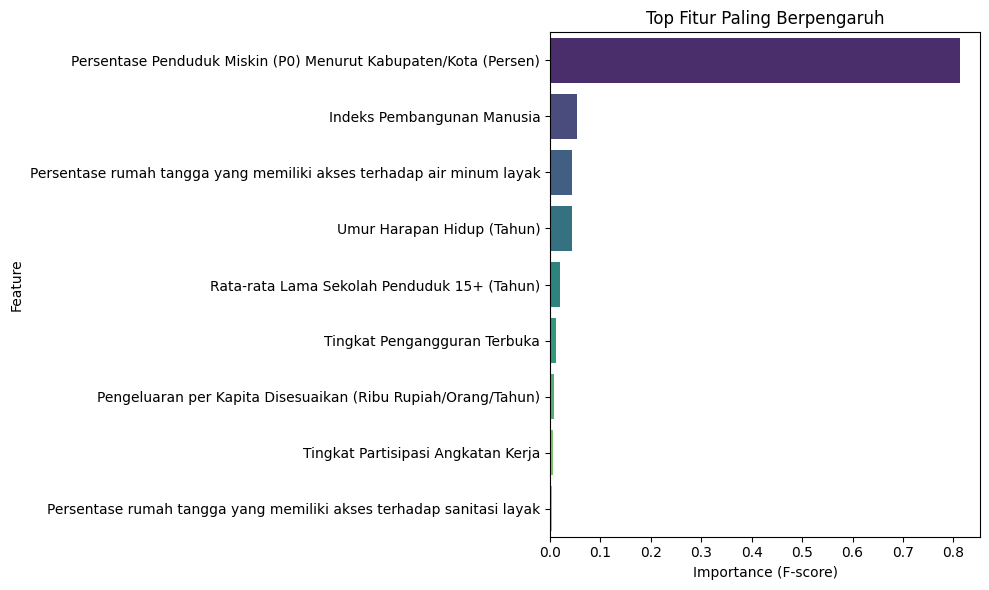

In [300]:
importance = xgb_final_model.feature_importances_

# Buat dataframe dan urutkan
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 5 Feature Importance:")
print(feature_importance_df.head())

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
# Menerapkan perbaikan dari FutureWarning
sns.barplot(x='Importance', y='Feature', data=feature_importance_df,
            hue='Feature', palette='viridis', legend=False)
plt.title('Top Fitur Paling Berpengaruh')
plt.xlabel('Importance (F-score)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [301]:
import joblib
import os

# Buat folder 'model' jika belum ada
model_dir = 'model'
os.makedirs(model_dir, exist_ok=True)

# Definisikan path lengkap untuk menyimpan model
model_path = os.path.join(model_dir, 'xgb_poverty_model.pkl')

# Simpan model menggunakan joblib
joblib.dump(xgb_model, model_path)

print(f"Model berhasil disimpan di: {model_path}")

Model berhasil disimpan di: model/xgb_poverty_model.pkl


In [302]:
# Definisikan path lengkap untuk menyimpan scaler
scaler_path = os.path.join(model_dir, 'scaler.pkl')

# Simpan scaler menggunakan joblib
joblib.dump(scaler, scaler_path)

print(f"Scaler berhasil disimpan di: {scaler_path}")

Scaler berhasil disimpan di: model/scaler.pkl
